In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks
import pymannkendall as mk

In [2]:
# total field
f='/project/xprecip/merra2_ncfiles/precip/resampled/all_merra_precip_6hourly_7-12.nc'
DS_precip_totalfield=xr.open_dataset(f)
lat_precip=DS_precip_totalfield['lat']
lon_precip=DS_precip_totalfield['lon']
total_precip_field=DS_precip_totalfield['PRECTOTCORR']
total_precip_field

<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
[358961460 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [3]:
total_precip_field

<xarray.DataArray 'PRECTOTCORR' (time: 60996, lat: 55, lon: 107)>
[358961460 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-09-30T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [5]:
winter_selected_precip=total_precip_field.isel(time=total_precip_field.time.dt.season.isin(['DJF']))
winter_selected_precip

<xarray.DataArray 'PRECTOTCORR' (time: 15040, lat: 55, lon: 107)>
array([[[0.000000e+00, 0.000000e+00, ..., 2.204289e-05, 1.842621e-05],
        [0.000000e+00, 0.000000e+00, ..., 3.027159e-05, 3.651972e-05],
        ...,
        [3.774315e-04, 6.056279e-04, ..., 2.262386e-07, 3.058958e-07],
        [9.444952e-04, 5.779564e-04, ..., 8.256684e-07, 1.790700e-06]],

       [[0.000000e+00, 0.000000e+00, ..., 1.187641e-04, 1.054555e-04],
        [0.000000e+00, 0.000000e+00, ..., 1.064856e-04, 1.059491e-04],
        ...,
        [2.018176e-04, 5.086437e-04, ..., 1.946996e-08, 2.082142e-08],
        [2.801940e-04, 3.041774e-04, ..., 1.507246e-07, 3.808451e-07]],

       ...,

       [[9.421259e-05, 1.891330e-04, ..., 3.322610e-06, 5.582348e-06],
        [1.186877e-04, 2.411008e-04, ..., 2.682558e-06, 9.052601e-07],
        ...,
        [2.429932e-04, 3.075302e-04, ..., 1.991806e-04, 4.378259e-04],
        [4.464984e-04, 2.876818e-04, ..., 1.202924e-04, 2.844222e-04]],

       [[5.186908e-05, 8.814409e-05, ..., 1.012668e-07, 2.146626e-07],
        [5.835295e-05, 1.027361e-04, ..., 5.224501e-08, 2.071538e-07],
        ...,
        [1.880005e-04, 2.283752e-04, ..., 6.690854e-06, 1.648441e-05],
        [4.151165e-04, 2.447367e-04, ..., 1.170929e-05, 2.054079e-05]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-02-28T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [6]:
sorted_args=winter_selected_precip.argsort(axis=0,kind='quicksort')
sorted_args

<xarray.DataArray 'PRECTOTCORR' (time: 15040, lat: 55, lon: 107)>
array([[[    0,     0,     0, ..., 10004,  2124,  2121],
        [    0,     0,     0, ...,  2174,  2112,  3780],
        [    0,     0,     0, ...,  2318,  2110,  2137],
        ...,
        [ 5171,  9550,  4914, ..., 12219,  6687, 12143],
        [ 3394,  3803,  4718, ...,  2567, 11433, 10832],
        [12627,  1399,  5430, ..., 10831,  6641, 10831]],

       [[ 4942,  9286,  1732, ..., 11880, 11793,  2125],
        [ 8098,  3509,  8753, ...,  6714, 12289,   212],
        [ 2069,  9287,  9352, ...,  3094, 12369,   749],
        ...,
        [13376, 12180,  3926, ...,  4826, 10174, 10174],
        [  105, 13375,  5904, ...,  6278,  6662,  5356],
        [10726, 12374,  5903, ..., 11433, 10899,  5356]],

       [[ 4941,  9285,  1733, ...,  8870, 11794,  2124],
        [ 8097,  9290,  8743, ...,  6713, 12288,   215],
        [ 2070,  9286,  9351, ...,  3095, 12368,  3396],
        ...,
...
        ...,
        [13540,  6450,  6912, ...,  6050,  6050, 11721],
        [ 7027, 13831,  3500, ...,  2767, 11458, 11458],
        [  343,  3860,  3500, ..., 11879, 13813, 13813]],

       [[ 5956,  5956, 12147, ..., 14358,  4811, 14794],
        [ 5957,  5112,  5111, ..., 14416, 14416,  9447],
        [ 5957,  5958,  5115, ...,  4811, 14416,  9447],
        ...,
        [10872,  7154,  3860, ...,  1346, 14160, 14160],
        [ 6428,  6428,  4980, ..., 11458,  6050,  9383],
        [ 1250,  3500,  7522, ...,  1346, 11879, 11879]],

       [[14171,  5111,  5111, ...,  4811,  9447,  9447],
        [ 5956,  5956,  5956, ...,  4811,  4811,  4811],
        [ 5956,  5956,  5956, ..., 14416,  4811,  4811],
        ...,
        [ 6669, 13831,  7154, ..., 14160,  5336,  5336],
        [13424,  4980,  3860, ...,  1346,  5336,  5336],
        [ 6449,  7522,  3860, ..., 14353, 14353, 14353]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-02-28T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [7]:
sorted_precip=winter_selected_precip.where(sorted_args)
sorted_precip

<xarray.DataArray 'PRECTOTCORR' (time: 15040, lat: 55, lon: 107)>
array([[[           nan,            nan,            nan, ...,
         5.82262874e-05, 2.20428919e-05, 1.84262080e-05],
        [           nan,            nan,            nan, ...,
         8.88705254e-05, 3.02715925e-05, 3.65197193e-05],
        [           nan,            nan,            nan, ...,
         1.00642443e-04, 7.37290829e-05, 4.27786727e-05],
        ...,
        [1.11673027e-04, 2.36183405e-04, 7.11262226e-04, ...,
         2.73971818e-06, 7.30695319e-07, 1.33126741e-06],
        [3.77431512e-04, 6.05627894e-04, 9.84698534e-04, ...,
         2.62336698e-07, 2.26238626e-07, 3.05895810e-07],
        [9.44495201e-04, 5.77956438e-04, 3.72618437e-04, ...,
         3.94789822e-07, 8.25668394e-07, 1.79070048e-06]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.55355781e-04, 1.18764117e-04, 1.05455518e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.67194754e-04, 1.06485561e-04, 1.05949119e-04],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.88339502e-04, 1.37213618e-04, 1.06500462e-04],
...
        [4.10377979e-05, 8.55736434e-05, 1.96844339e-04, ...,
         9.16621648e-05, 2.13229097e-04, 4.09353524e-04],
        [2.42993236e-04, 3.07530165e-04, 2.95296311e-04, ...,
         7.69712206e-05, 1.99180562e-04, 4.37825918e-04],
        [4.46498394e-04, 2.87681818e-04, 1.03987753e-04, ...,
         3.61951534e-05, 1.20292418e-04, 2.84422189e-04]],

       [[5.18690795e-05, 8.81440938e-05, 1.40517950e-04, ...,
         7.90769263e-08, 1.01266778e-07, 2.14662577e-07],
        [5.83529472e-05, 1.02736056e-04, 1.24983490e-04, ...,
         2.49992809e-08, 5.22450136e-08, 2.07153789e-07],
        [6.80480152e-05, 9.31154937e-05, 1.00117177e-04, ...,
         1.31103661e-08, 2.93857738e-08, 1.64309313e-07],
        ...,
        [3.80016863e-05, 4.60091978e-05, 1.68263912e-04, ...,
         2.11095903e-06, 6.58282079e-06, 1.94096938e-05],
        [1.88000500e-04, 2.28375196e-04, 2.79635191e-04, ...,
         4.20206925e-06, 6.69085421e-06, 1.64844096e-05],
        [4.15116549e-04, 2.44736671e-04, 1.16743147e-04, ...,
         8.02078284e-06, 1.17092859e-05, 2.05407850e-05]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2021-02-28T18:00:00
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [8]:
monthly_timeseries=[]
for i in range(1980,2022,1):
    print(i)
    year_of_data = sorted_precip.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).groupby('time.month')
    timeseries_95th=year_of_data.quantile(0.95,dim='time')
    #print(year_of_data)
    monthly_timeseries.append(timeseries_95th)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [9]:
monthly_ts=xr.concat(monthly_timeseries,dim='month')
monthly_ts

<xarray.DataArray 'PRECTOTCORR' (month: 125, lat: 55, lon: 107)>
array([[[1.85940415e-04, 1.96054578e-04, 1.90211087e-04, ...,
         2.90038437e-04, 2.48865969e-04, 2.44114920e-04],
        [2.00415030e-04, 2.10582465e-04, 1.78311369e-04, ...,
         3.30616906e-04, 2.90554017e-04, 2.94637680e-04],
        [2.11132318e-04, 2.12281942e-04, 1.96649134e-04, ...,
         3.94534320e-04, 3.63975577e-04, 3.32392752e-04],
        ...,
        [1.39317065e-03, 1.32650137e-03, 1.77010298e-03, ...,
         9.49790701e-04, 1.11991498e-03, 1.54386610e-03],
        [1.24389529e-03, 1.46435946e-03, 1.52236223e-03, ...,
         1.11578852e-03, 1.23938513e-03, 1.58964097e-03],
        [1.38618052e-03, 1.12091899e-03, 9.16334987e-04, ...,
         1.04535618e-03, 1.24866068e-03, 1.31470859e-03]],

       [[1.02761478e-04, 6.53481111e-05, 6.62133098e-05, ...,
         1.88068487e-04, 2.32496299e-04, 2.19876878e-04],
        [1.02720223e-04, 8.49803910e-05, 8.14194791e-05, ...,
         2.69595534e-04, 2.18127854e-04, 2.00681388e-04],
        [9.93050635e-05, 1.20396726e-04, 1.29865482e-04, ...,
         3.17185652e-04, 3.18586826e-04, 2.78357416e-04],
...
        [2.02577561e-03, 2.47141123e-03, 2.57126838e-03, ...,
         4.64170333e-04, 4.86804545e-04, 5.33458963e-04],
        [2.54132301e-03, 2.77450085e-03, 2.31924951e-03, ...,
         4.26093303e-04, 4.99174558e-04, 5.11486083e-04],
        [2.16613561e-03, 8.98081809e-04, 8.34667683e-04, ...,
         4.35915217e-04, 4.73417155e-04, 4.79216129e-04]],

       [[1.97225180e-04, 1.35556777e-04, 1.71155669e-04, ...,
         1.05940178e-04, 1.41358003e-04, 1.29467249e-04],
        [1.08007994e-04, 1.03938021e-04, 1.68073046e-04, ...,
         1.15883537e-04, 1.07487850e-04, 1.09456107e-04],
        [1.34807744e-04, 1.39785185e-04, 1.61245093e-04, ...,
         1.24927517e-04, 1.15374289e-04, 1.49487890e-04],
        ...,
        [8.84798169e-04, 8.61307979e-04, 9.16301459e-04, ...,
         1.14060938e-03, 1.23605281e-03, 1.35677606e-03],
        [1.24582946e-03, 1.14914477e-03, 8.51890445e-04, ...,
         1.17508620e-03, 1.43550932e-03, 1.67490989e-03],
        [1.44194365e-03, 6.23777509e-04, 3.79882008e-04, ...,
         9.67106782e-04, 1.10915257e-03, 1.25917243e-03]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.95
  * month     (month) int64 1 2 12 1 2 12 1 2 12 1 2 ... 2 12 1 2 12 1 2 12 1 2

In [10]:
dec_ts=monthly_ts.sel(month=12)
dec_ts

<xarray.DataArray 'PRECTOTCORR' (month: 41, lat: 55, lon: 107)>
array([[[1.72249088e-04, 7.37467315e-05, 5.46500332e-05, ...,
         7.58062303e-04, 6.28574193e-04, 6.50590658e-04],
        [7.09442887e-05, 3.84409912e-05, 3.13956300e-05, ...,
         8.25206190e-04, 6.84297085e-04, 6.35255873e-04],
        [6.76378608e-05, 4.76374902e-05, 3.16226389e-05, ...,
         8.28100741e-04, 8.98498297e-04, 8.51991773e-04],
        ...,
        [3.92550975e-03, 4.42130715e-03, 5.71507812e-03, ...,
         1.55041367e-03, 1.12744570e-03, 1.29421055e-03],
        [4.81738448e-03, 4.55617309e-03, 4.82203960e-03, ...,
         1.12701058e-03, 1.19382702e-03, 1.26360208e-03],
        [4.54730988e-03, 3.29699516e-03, 2.32061744e-03, ...,
         8.40760767e-04, 9.36379284e-04, 1.02770030e-03]],

       [[2.43683299e-04, 1.96691602e-04, 1.77568756e-04, ...,
         1.47592723e-03, 1.77209526e-03, 1.67928934e-03],
        [2.06345320e-04, 1.66175514e-04, 1.48492679e-04, ...,
         1.64071918e-03, 1.79788321e-03, 2.03738362e-03],
        [1.74616650e-04, 1.46690384e-04, 1.20872445e-04, ...,
         1.74677372e-03, 1.67911947e-03, 1.80701315e-03],
...
        [3.76054347e-03, 3.83965969e-03, 3.11192125e-03, ...,
         1.31570548e-03, 1.31590217e-03, 1.37970354e-03],
        [4.54873890e-03, 4.10645008e-03, 2.51121819e-03, ...,
         1.12125240e-03, 1.05162486e-03, 1.20407918e-03],
        [3.23962569e-03, 1.89549327e-03, 1.11064613e-03, ...,
         9.21937823e-04, 1.13325864e-03, 1.37916356e-03]],

       [[9.41312872e-05, 1.08254328e-04, 1.09764561e-04, ...,
         4.63034958e-04, 5.00251353e-04, 4.42731380e-04],
        [1.12076290e-04, 9.64257866e-05, 1.27271935e-04, ...,
         5.69775701e-04, 4.08082455e-04, 3.67375091e-04],
        [1.24943070e-04, 1.15412660e-04, 1.24132633e-04, ...,
         6.64521754e-04, 5.28921187e-04, 5.25188446e-04],
        ...,
        [2.37505734e-03, 3.17722559e-03, 2.95618176e-03, ...,
         1.35223120e-03, 1.21772438e-03, 9.92148148e-04],
        [3.21100652e-03, 2.69697011e-03, 2.05034018e-03, ...,
         1.36737321e-03, 1.26427263e-03, 1.01566911e-03],
        [2.29350924e-03, 1.10421777e-03, 9.60090756e-04, ...,
         1.84312277e-03, 1.82102472e-03, 1.62503123e-03]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.95
  * month     (month) int64 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12

In [12]:
from scipy.stats import mstats
months=np.arange(0,41,1)
nlons=len(dec_ts['lon'])
nlats=len(dec_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_dec=np.zeros((nlats,nlons))
low_ci_dec=np.zeros((nlats,nlons))
high_ci_dec=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=dec_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_dec[j,i]=slope_thiel
        low_ci_dec[j,i]=low_slope
        high_ci_dec[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

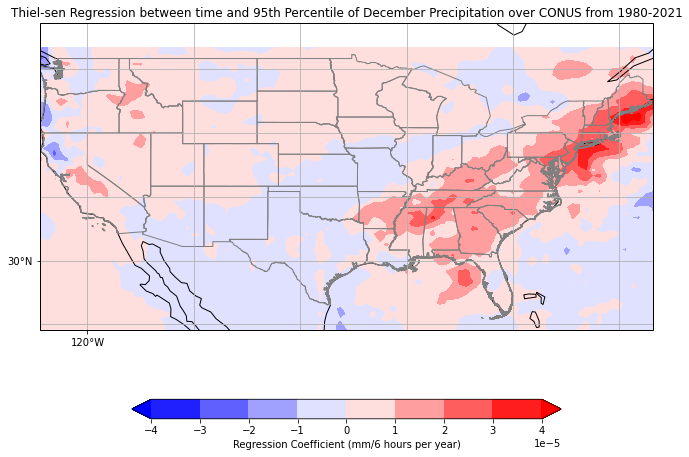

In [21]:
#clevs=np.arange(-1.0,1.0,10)
max_val=4e-5
increment=1e-5

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_dec
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (mm/6 hours per year)')

# Add title
plt.title('Thiel-sen Regression between time and 95th Percentile of December Precipitation over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec95th_6hrprecip_thielsen.png')

In [15]:
jan_ts=monthly_ts.sel(month=1)
jan_ts

<xarray.DataArray 'PRECTOTCORR' (month: 42, lat: 55, lon: 107)>
array([[[1.85940415e-04, 1.96054578e-04, 1.90211087e-04, ...,
         2.90038437e-04, 2.48865969e-04, 2.44114920e-04],
        [2.00415030e-04, 2.10582465e-04, 1.78311369e-04, ...,
         3.30616906e-04, 2.90554017e-04, 2.94637680e-04],
        [2.11132318e-04, 2.12281942e-04, 1.96649134e-04, ...,
         3.94534320e-04, 3.63975577e-04, 3.32392752e-04],
        ...,
        [1.39317065e-03, 1.32650137e-03, 1.77010298e-03, ...,
         9.49790701e-04, 1.11991498e-03, 1.54386610e-03],
        [1.24389529e-03, 1.46435946e-03, 1.52236223e-03, ...,
         1.11578852e-03, 1.23938513e-03, 1.58964097e-03],
        [1.38618052e-03, 1.12091899e-03, 9.16334987e-04, ...,
         1.04535618e-03, 1.24866068e-03, 1.31470859e-03]],

       [[1.49429962e-04, 1.20126456e-04, 1.24473497e-04, ...,
         9.14530456e-04, 7.40933418e-04, 6.67625666e-04],
        [1.12905726e-04, 1.10783242e-04, 1.14412047e-04, ...,
         1.16116703e-03, 7.33017921e-04, 6.96612895e-04],
        [1.02179009e-04, 1.32598542e-04, 1.41591206e-04, ...,
         1.05220377e-03, 1.07727349e-03, 7.68046081e-04],
...
        [3.96133065e-03, 4.35488224e-03, 4.08713520e-03, ...,
         7.31128454e-04, 6.74963929e-04, 7.58771319e-04],
        [5.08971810e-03, 4.80416417e-03, 3.50500643e-03, ...,
         5.05233184e-04, 5.21581620e-04, 7.26137310e-04],
        [4.01227474e-03, 2.20064819e-03, 1.51826441e-03, ...,
         6.04023039e-04, 6.64721429e-04, 7.03121722e-04]],

       [[3.35034914e-04, 2.79159844e-04, 3.32960486e-04, ...,
         1.12721883e-04, 1.54346414e-04, 1.47827715e-04],
        [2.85517052e-04, 3.01606953e-04, 3.22279707e-04, ...,
         1.20407157e-04, 1.59149244e-04, 1.73748098e-04],
        [2.73880735e-04, 1.74327660e-04, 2.23674811e-04, ...,
         1.88920647e-04, 1.72804296e-04, 2.21212953e-04],
        ...,
        [2.02577561e-03, 2.47141123e-03, 2.57126838e-03, ...,
         4.64170333e-04, 4.86804545e-04, 5.33458963e-04],
        [2.54132301e-03, 2.77450085e-03, 2.31924951e-03, ...,
         4.26093303e-04, 4.99174558e-04, 5.11486083e-04],
        [2.16613561e-03, 8.98081809e-04, 8.34667683e-04, ...,
         4.35915217e-04, 4.73417155e-04, 4.79216129e-04]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.95
  * month     (month) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1

In [16]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(jan_ts['lon'])
nlats=len(jan_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array=np.zeros((nlats,nlons))
low_ci=np.zeros((nlats,nlons))
high_ci=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=jan_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array[j,i]=slope_thiel
        low_ci[j,i]=low_slope
        high_ci[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

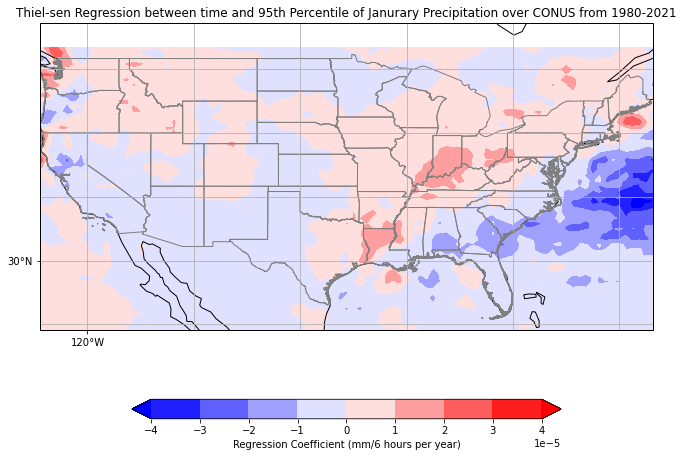

In [20]:
fig = plt.figure(figsize=(11,8.5))
max_val=4e-5
increment=1e-5

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (mm/6 hours per year)')

# Add title
plt.title('Thiel-sen Regression between time and 95th Percentile of Janurary Precipitation over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan95th_6hrprecip_thielsen.png')

In [22]:
feb_ts=monthly_ts.sel(month=2)
feb_ts

<xarray.DataArray 'PRECTOTCORR' (month: 42, lat: 55, lon: 107)>
array([[[1.02761478e-04, 6.53481111e-05, 6.62133098e-05, ...,
         1.88068487e-04, 2.32496299e-04, 2.19876878e-04],
        [1.02720223e-04, 8.49803910e-05, 8.14194791e-05, ...,
         2.69595534e-04, 2.18127854e-04, 2.00681388e-04],
        [9.93050635e-05, 1.20396726e-04, 1.29865482e-04, ...,
         3.17185652e-04, 3.18586826e-04, 2.78357416e-04],
        ...,
        [1.71308219e-03, 2.06501409e-03, 3.14770639e-03, ...,
         3.96612566e-04, 5.21082431e-04, 5.45072369e-04],
        [1.51020288e-03, 1.62471831e-03, 2.16577947e-03, ...,
         4.34690155e-04, 4.39947005e-04, 5.23459632e-04],
        [1.03021786e-03, 8.28355551e-04, 1.11804157e-03, ...,
         3.79971694e-04, 4.11524903e-04, 4.09241766e-04]],

       [[2.95591727e-04, 4.07302752e-04, 4.36003879e-04, ...,
         9.40862298e-04, 9.33858752e-04, 9.48156416e-04],
        [2.24194303e-04, 3.77824530e-04, 4.78462130e-04, ...,
         7.52083957e-04, 8.11603665e-04, 7.46601820e-04],
        [1.37848966e-04, 1.49152800e-04, 3.37208528e-04, ...,
         7.76596367e-04, 6.26775622e-04, 5.77617809e-04],
...
        [1.53564662e-03, 1.66666508e-03, 1.71518326e-03, ...,
         7.52312830e-04, 7.63475895e-04, 1.04532391e-03],
        [2.23681331e-03, 2.03548372e-03, 1.65954977e-03, ...,
         6.73063099e-04, 7.22393394e-04, 9.42829996e-04],
        [1.96816027e-03, 1.06120855e-03, 7.05193728e-04, ...,
         4.15590359e-04, 4.45291051e-04, 5.55090606e-04]],

       [[1.97225180e-04, 1.35556777e-04, 1.71155669e-04, ...,
         1.05940178e-04, 1.41358003e-04, 1.29467249e-04],
        [1.08007994e-04, 1.03938021e-04, 1.68073046e-04, ...,
         1.15883537e-04, 1.07487850e-04, 1.09456107e-04],
        [1.34807744e-04, 1.39785185e-04, 1.61245093e-04, ...,
         1.24927517e-04, 1.15374289e-04, 1.49487890e-04],
        ...,
        [8.84798169e-04, 8.61307979e-04, 9.16301459e-04, ...,
         1.14060938e-03, 1.23605281e-03, 1.35677606e-03],
        [1.24582946e-03, 1.14914477e-03, 8.51890445e-04, ...,
         1.17508620e-03, 1.43550932e-03, 1.67490989e-03],
        [1.44194365e-03, 6.23777509e-04, 3.79882008e-04, ...,
         9.67106782e-04, 1.10915257e-03, 1.25917243e-03]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.95
  * month     (month) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2

In [23]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(feb_ts['lon'])
nlats=len(feb_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_feb=np.zeros((nlats,nlons))
low_ci_feb=np.zeros((nlats,nlons))
high_ci_feb=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=feb_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_feb[j,i]=slope_thiel
        low_ci_feb[j,i]=low_slope
        high_ci_feb[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

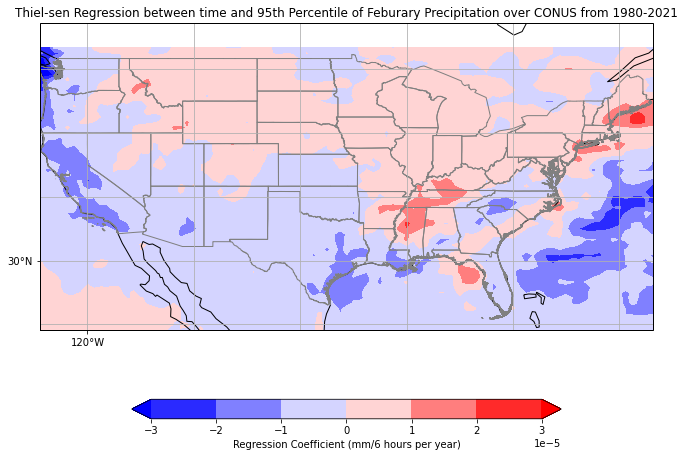

In [25]:
max_val=3e-5
increment=1e-5

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_feb
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (mm/6 hours per year)')

# Add title
plt.title('Thiel-sen Regression between time and 95th Percentile of Feburary Precipitation over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb95th_6hrprecip_thielsen.png')

### Median Analysis

In [26]:
monthly_timeseries=[]
for i in range(1980,2022,1):
    print(i)
    year_of_data = sorted_precip.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).groupby('time.month')
    timeseries_50th=year_of_data.quantile(0.50,dim='time')
    #print(year_of_data)
    monthly_timeseries.append(timeseries_50th)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


In [27]:
monthly_ts=xr.concat(monthly_timeseries,dim='month')
monthly_ts

<xarray.DataArray 'PRECTOTCORR' (month: 125, lat: 55, lon: 107)>
array([[[7.92264473e-07, 9.08427751e-07, 9.11299139e-07, ...,
         2.15545297e-05, 1.70690473e-05, 1.94162130e-05],
        [1.24657527e-06, 1.09381563e-06, 1.01990054e-06, ...,
         2.06358964e-05, 2.00804789e-05, 2.45646952e-05],
        [8.82537279e-07, 7.39586540e-07, 7.13829650e-07, ...,
         1.90292485e-05, 1.96360052e-05, 2.39401124e-05],
        ...,
        [8.19585985e-05, 7.05239363e-05, 4.15779650e-05, ...,
         3.03396955e-05, 3.06519214e-05, 4.16776165e-05],
        [7.98881520e-05, 5.40128094e-05, 5.90875788e-05, ...,
         1.52210705e-05, 2.66218558e-05, 4.65498306e-05],
        [9.67495143e-05, 6.03492317e-05, 2.73799524e-05, ...,
         8.79688605e-06, 1.67924445e-05, 3.16669611e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.01222720e-05, 1.60389172e-05, 1.99060887e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.62930989e-05, 2.37646746e-05, 2.08784722e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.26363370e-05, 2.40790587e-05, 2.60184752e-05],
...
        [5.34495339e-05, 5.36707230e-05, 8.29570927e-05, ...,
         1.48320687e-05, 1.59811461e-05, 1.87054975e-05],
        [9.64449719e-05, 9.08700749e-05, 1.51066110e-04, ...,
         1.22442607e-05, 1.51147251e-05, 1.81171636e-05],
        [1.20490789e-04, 1.14427879e-04, 7.26431608e-05, ...,
         7.78702088e-06, 8.61863373e-06, 1.10657420e-05]],

       [[1.39008625e-06, 6.54115865e-07, 6.40568032e-07, ...,
         6.96213101e-06, 7.21105607e-06, 8.03777948e-06],
        [7.06665560e-07, 5.47299095e-10, 3.66804344e-10, ...,
         4.59107105e-06, 5.41273039e-06, 6.61727972e-06],
        [1.03677303e-06, 3.39538175e-10, 2.19139793e-11, ...,
         3.09647294e-06, 3.45829176e-06, 3.80852725e-06],
        ...,
        [4.99212183e-05, 6.06619287e-05, 6.74631447e-05, ...,
         9.70372639e-06, 9.77283344e-06, 2.17352062e-05],
        [9.41706821e-05, 7.94444531e-05, 7.58324750e-05, ...,
         7.82150892e-06, 1.49922562e-05, 1.72660184e-05],
        [1.60615891e-04, 1.32991001e-04, 5.81392087e-05, ...,
         6.02112959e-06, 7.22557888e-06, 7.23806443e-06]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.5
  * month     (month) int64 1 2 12 1 2 12 1 2 12 1 2 ... 2 12 1 2 12 1 2 12 1 2

In [28]:
dec_ts=monthly_ts.sel(month=12)
dec_ts

<xarray.DataArray 'PRECTOTCORR' (month: 41, lat: 55, lon: 107)>
array([[[2.21626919e-07, 2.60505217e-07, 1.53664132e-07, ...,
         8.89664516e-05, 7.23218545e-05, 6.70962036e-05],
        [2.89384616e-07, 2.04938260e-07, 2.42003352e-07, ...,
         1.16402283e-04, 9.49450769e-05, 8.42791051e-05],
        [3.67576831e-07, 2.05657017e-07, 2.46045232e-07, ...,
         1.32933725e-04, 1.16395764e-04, 9.29597300e-05],
        ...,
        [2.52064317e-04, 4.22619283e-04, 5.84624708e-04, ...,
         9.85250808e-05, 9.76212323e-05, 1.11579895e-04],
        [3.00038606e-04, 3.90455127e-04, 5.24185598e-04, ...,
         6.96480274e-05, 8.01617280e-05, 8.41032015e-05],
        [1.92357227e-04, 2.06040218e-04, 2.46841460e-04, ...,
         4.26936895e-05, 4.37577255e-05, 5.19547611e-05]],

       [[2.76722130e-06, 3.19561514e-06, 2.88944148e-06, ...,
         4.06703912e-05, 2.44281255e-05, 2.74911290e-05],
        [1.40284828e-06, 1.32554123e-06, 1.67146783e-06, ...,
         3.35057266e-05, 3.01855616e-05, 3.00132670e-05],
        [1.27946078e-06, 8.68598363e-07, 1.45661761e-06, ...,
         2.43531540e-05, 2.76544597e-05, 2.55090417e-05],
...
        [2.10277736e-04, 2.76584178e-04, 2.75567174e-04, ...,
         1.81028154e-05, 1.86043035e-05, 2.82520487e-05],
        [3.82430851e-04, 4.12315130e-04, 3.01487744e-04, ...,
         1.08870445e-05, 1.26529485e-05, 2.03293748e-05],
        [4.29332256e-04, 2.91638076e-04, 1.59520656e-04, ...,
         9.14966222e-06, 1.11876871e-05, 1.04717328e-05]],

       [[1.32627611e-06, 1.29991645e-06, 9.36655852e-07, ...,
         1.74045563e-05, 1.53095461e-05, 1.47942919e-05],
        [2.25113808e-07, 1.06301892e-09, 1.35637723e-10, ...,
         1.81498472e-05, 1.63586810e-05, 1.54214795e-05],
        [2.76715582e-07, 3.39029672e-12, 1.51840758e-12, ...,
         1.83780212e-05, 1.71069987e-05, 1.91633590e-05],
        ...,
        [7.74115324e-05, 1.07577071e-04, 1.15570612e-04, ...,
         2.46716745e-05, 2.33096071e-05, 3.01515684e-05],
        [1.26786028e-04, 1.24308281e-04, 1.40709803e-04, ...,
         2.58184737e-05, 3.13578130e-05, 2.45418632e-05],
        [1.84446573e-04, 1.46370381e-04, 8.38134438e-05, ...,
         2.46679992e-05, 3.13445926e-05, 2.95822974e-05]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.5
  * month     (month) int64 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12

In [29]:
from scipy.stats import mstats
months=np.arange(0,41,1)
nlons=len(dec_ts['lon'])
nlats=len(dec_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_dec=np.zeros((nlats,nlons))
low_ci_dec=np.zeros((nlats,nlons))
high_ci_dec=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=dec_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_dec[j,i]=slope_thiel
        low_ci_dec[j,i]=low_slope
        high_ci_dec[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

In [38]:
m_array_dec

array([[ 1.68195964e-07,  1.64717066e-07,  1.71793119e-07, ...,
        -7.98714205e-08, -5.96807116e-08, -8.92091406e-08],
       [ 1.25998419e-07,  1.11532197e-07,  1.10929250e-07, ...,
        -8.19189430e-08, -7.55318262e-08, -8.06678353e-08],
       [ 1.31102376e-07,  1.36165753e-07,  1.17841050e-07, ...,
        -6.98978782e-08, -6.98301543e-08, -1.03907108e-07],
       ...,
       [ 1.24120221e-06,  7.02984643e-07,  1.04439619e-06, ...,
        -2.49491067e-07, -5.06766122e-07, -6.43055363e-07],
       [ 2.44618429e-06,  2.91839531e-06,  1.49503768e-06, ...,
        -2.21322213e-07, -4.17152461e-07, -6.20705708e-07],
       [ 4.69900521e-06,  3.14344652e-06,  1.11325339e-06, ...,
        -7.32036587e-08, -9.82185460e-08, -1.36494711e-07]])

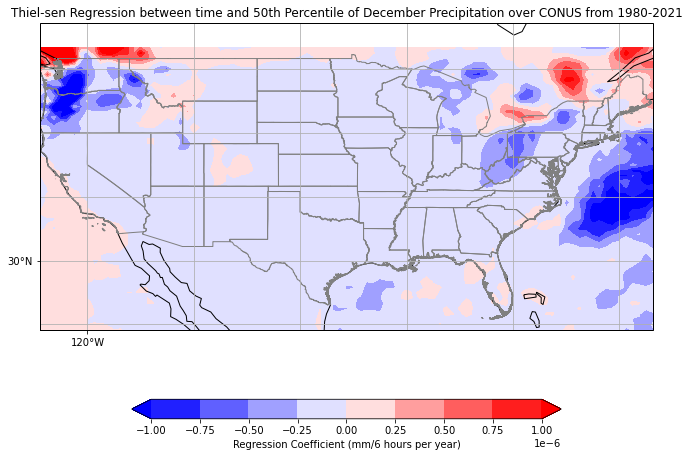

In [39]:
#clevs=np.linspace(-0.1,0.1,20)
max_val=1e-6
increment=0.25e-6

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_dec
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (mm/6 hours per year)')

# Add title
plt.title('Thiel-sen Regression between time and 50th Percentile of December Precipitation over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/dec50th_6hrprecip_thielsen.png')

In [40]:
jan_ts=monthly_ts.sel(month=1)
jan_ts

<xarray.DataArray 'PRECTOTCORR' (month: 42, lat: 55, lon: 107)>
array([[[7.92264473e-07, 9.08427751e-07, 9.11299139e-07, ...,
         2.15545297e-05, 1.70690473e-05, 1.94162130e-05],
        [1.24657527e-06, 1.09381563e-06, 1.01990054e-06, ...,
         2.06358964e-05, 2.00804789e-05, 2.45646952e-05],
        [8.82537279e-07, 7.39586540e-07, 7.13829650e-07, ...,
         1.90292485e-05, 1.96360052e-05, 2.39401124e-05],
        ...,
        [8.19585985e-05, 7.05239363e-05, 4.15779650e-05, ...,
         3.03396955e-05, 3.06519214e-05, 4.16776165e-05],
        [7.98881520e-05, 5.40128094e-05, 5.90875788e-05, ...,
         1.52210705e-05, 2.66218558e-05, 4.65498306e-05],
        [9.67495143e-05, 6.03492317e-05, 2.73799524e-05, ...,
         8.79688605e-06, 1.67924445e-05, 3.16669611e-05]],

       [[4.70153009e-06, 6.61544618e-06, 6.95633935e-06, ...,
         1.18006952e-04, 7.94897787e-05, 8.11778009e-05],
        [5.36329526e-06, 3.83371469e-06, 6.36372715e-06, ...,
         1.43006444e-04, 1.27751380e-04, 1.19106844e-04],
        [4.74348781e-06, 4.93659172e-06, 4.02019941e-06, ...,
         1.26009807e-04, 1.47670507e-04, 1.42309815e-04],
...
        [4.63671982e-04, 5.85794449e-04, 6.63958490e-04, ...,
         1.34410948e-05, 1.88327394e-05, 2.56309286e-05],
        [5.56394458e-04, 6.70745969e-04, 7.19472766e-04, ...,
         8.64861067e-06, 1.40050470e-05, 1.99580063e-05],
        [5.43244183e-04, 4.26065177e-04, 3.36278230e-04, ...,
         6.30578143e-06, 9.93115827e-06, 1.22911297e-05]],

       [[6.43972831e-09, 3.07130676e-09, 1.38530609e-08, ...,
         7.09958840e-06, 1.07318047e-05, 1.41777564e-05],
        [1.80169955e-08, 2.69231393e-08, 1.71411836e-08, ...,
         8.96432903e-06, 1.26803643e-05, 1.59835909e-05],
        [2.17817893e-08, 3.46706365e-08, 9.49681667e-09, ...,
         8.55891267e-06, 1.12490961e-05, 1.33140129e-05],
        ...,
        [5.34495339e-05, 5.36707230e-05, 8.29570927e-05, ...,
         1.48320687e-05, 1.59811461e-05, 1.87054975e-05],
        [9.64449719e-05, 9.08700749e-05, 1.51066110e-04, ...,
         1.22442607e-05, 1.51147251e-05, 1.81171636e-05],
        [1.20490789e-04, 1.14427879e-04, 7.26431608e-05, ...,
         7.78702088e-06, 8.61863373e-06, 1.10657420e-05]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.5
  * month     (month) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1

In [41]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(jan_ts['lon'])
nlats=len(jan_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array=np.zeros((nlats,nlons))
low_ci=np.zeros((nlats,nlons))
high_ci=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=jan_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array[j,i]=slope_thiel
        low_ci[j,i]=low_slope
        high_ci[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

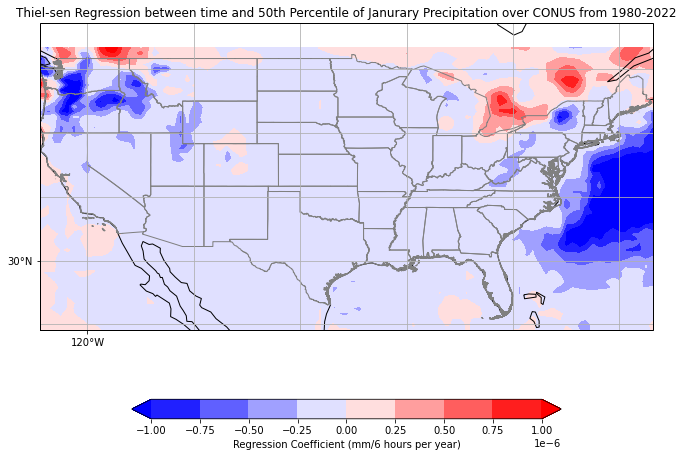

In [43]:
#clevs=np.linspace(-0.125,0.125,20)
max_val=1e-6
increment=0.25e-6

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')

# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (mm/6 hours per year)')

# Add title
plt.title('Thiel-sen Regression between time and 50th Percentile of Janurary Precipitation over CONUS from 1980-2022')
plt.savefig('/homes/areed29/CLIM997/summer22_research/jan50th_6hrprecip_thielsen.png')

In [44]:
feb_ts=monthly_ts.sel(month=2)
feb_ts

<xarray.DataArray 'PRECTOTCORR' (month: 42, lat: 55, lon: 107)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.01222720e-05, 1.60389172e-05, 1.99060887e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.62930989e-05, 2.37646746e-05, 2.08784722e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.26363370e-05, 2.40790587e-05, 2.60184752e-05],
        ...,
        [7.88038597e-05, 6.47492707e-05, 8.52718949e-05, ...,
         4.91835526e-05, 5.73233701e-05, 7.04471022e-05],
        [7.41838012e-05, 5.36994194e-05, 6.15883619e-05, ...,
         3.60449776e-05, 4.97475266e-05, 6.74850307e-05],
        [6.43758103e-05, 4.08322667e-05, 6.60244550e-05, ...,
         9.29097587e-06, 2.21647788e-05, 3.11424956e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.61007808e-05, 2.76328065e-05, 2.76695937e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.59570079e-05, 3.07203736e-05, 3.24063003e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         3.34705692e-05, 3.78270634e-05, 4.08571213e-05],
...
        [7.33710185e-05, 8.55876133e-05, 1.02603208e-04, ...,
         7.42297925e-06, 8.30774661e-06, 1.25589850e-05],
        [1.20269484e-04, 1.56955328e-04, 1.37335308e-04, ...,
         8.00855969e-06, 1.35941664e-05, 1.34652946e-05],
        [1.78046525e-04, 2.16625631e-04, 7.80494884e-05, ...,
         9.99681652e-06, 1.22405763e-05, 1.44991791e-05]],

       [[1.39008625e-06, 6.54115865e-07, 6.40568032e-07, ...,
         6.96213101e-06, 7.21105607e-06, 8.03777948e-06],
        [7.06665560e-07, 5.47299095e-10, 3.66804344e-10, ...,
         4.59107105e-06, 5.41273039e-06, 6.61727972e-06],
        [1.03677303e-06, 3.39538175e-10, 2.19139793e-11, ...,
         3.09647294e-06, 3.45829176e-06, 3.80852725e-06],
        ...,
        [4.99212183e-05, 6.06619287e-05, 6.74631447e-05, ...,
         9.70372639e-06, 9.77283344e-06, 2.17352062e-05],
        [9.41706821e-05, 7.94444531e-05, 7.58324750e-05, ...,
         7.82150892e-06, 1.49922562e-05, 1.72660184e-05],
        [1.60615891e-04, 1.32991001e-04, 5.81392087e-05, ...,
         6.02112959e-06, 7.22557888e-06, 7.23806443e-06]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.5
  * month     (month) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2

In [45]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(feb_ts['lon'])
nlats=len(feb_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_feb=np.zeros((nlats,nlons))
low_ci_feb=np.zeros((nlats,nlons))
high_ci_feb=np.zeros((nlats,nlons))
for i in range(nlons):
    for j in range(nlats): 
        y=feb_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_feb[j,i]=slope_thiel
        low_ci_feb[j,i]=low_slope
        high_ci_feb[j,i]=high_slope
        #r_array[j,i]=r
        #p_array[j,i]=p

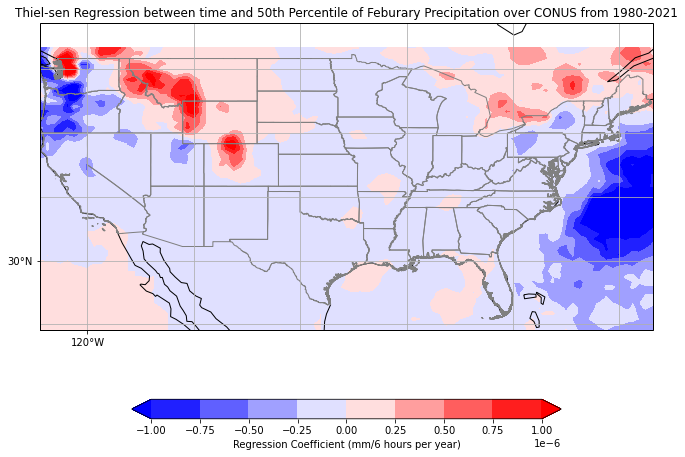

In [47]:
#clevs=np.linspace(-0.125,0.125,20)
max_val=1e-6
increment=0.25e-6

clevs = np.arange(start=-max_val, stop=max_val+increment, step=increment)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_feb
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (mm/6 hours per year)')

# Add title
plt.title('Thiel-sen Regression between time and 50th Percentile of Feburary Precipitation over CONUS from 1980-2021')
plt.savefig('/homes/areed29/CLIM997/summer22_research/feb95th_6hrprecip_thielsen.png')